## FrisPy and Object Oriented Python:

Way too much that I am having to figure out here. I can practically feel the neurons screaming in my brain. It's clear that I haven't spent enough time working in the world of object oriented code though it has crossed my path without me really realizing it. To sort out how this all works FrisPy is a good example. It is a lightly documented python package that can provide me with plenty of learning experiences. 

This notebook will be dedicated to sorting out what the documentation means and I will use a parallel notebook - FrispyExplorationsII.ipynb - to build examples of the output of the process.


### References

The [github for this project](https://github.com/tmcclintock/FrisPy) is linked. Here is the [web documentation](https://frispy.readthedocs.io/en/latest/autoapi/frispy/index.html). I suspect my biggest challenge is just that I still very unclear about the object oriented stuff. This will hopefully be my opportunity to grow my understanding.

This is a project from Tom McClintock. Tom was a graduate student at the University of Arizona working on computational modeling of galaxy formation and dark matter among many other topics. The [Aemulus Project](https://aemulusproject.github.io/people.html) is an example of his work. It appears that he is now working as a quantitative researcher for a financial firm (Susquehanna International Group) in San Francisco. Not an uncommon path for computational physicists. Here is[Tom's Frisbee article](https://www.wildcat.arizona.edu/article/2015/09/grad-student-figures-out-frisbee-physics) from when he was a student at UA. 

#### Learning about web scrapers:

I noticed that all the email addresses on the Aemulus project page are written out this way - tmcclintock89 at gmail dot com. It seemed likely that this is a strategy for making email addresses on public pages less visible to bots which are seeking to build up email addresses for large lists. A little quick searching confirms that this is the case.

### Installation

To install the frispy package I opened a terminal window in Jupyterlab and did a pip intall of frispy. This assures that it is in the right place for Jupyterlab to find it. This can be verified by importing the package and seeing that it works.

In [2]:
import frispy

### Big Picture

When we generate an instance of frispy.Disc() the package takes all of the established features of the disc and the initial conditions

### Exploring:

``` 
dir(frispy)
```

This displays all the names that are part of the frispy.py. If we look at [Tim's github](https://github.com/tmcclintock/FrisPy/tree/master/frispy) for this project we see that the first 5 entries in this list are the 5 modules in the frispy package. I note with interest that the wind module has not been implemented yet though the structure of the module has been established. The following in the __init__.py which is what, I assume, builds the package.

```

from .disc import Disc
from .environment import Environment
from .equations_of_motion import EOM
from .model import Model
from .trajectory import Trajectory

__author__ = "Tom McClintock thmsmcclintock@gmail.com"
__version__ = "1.0.4"
__docs__ = "Simulates flying spinning discs."
```

In [9]:
dir (frispy)

['Disc',
 'EOM',
 'Environment',
 'Model',
 'Trajectory',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docs__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'disc',
 'environment',
 'equations_of_motion',
 'model',
 'trajectory']

#### Attributes of Frispy

In [25]:
print("author: ", frispy.__author__)
print("version: ", frispy.__version__)
print("docs: ", frispy.__docs__)
#print("builtins: ", frispy.__builtins__)

author:  Tom McClintock thmsmcclintock@gmail.com
version:  1.0.4
docs:  Simulates flying spinning discs.


### Disc

The most immediately relevant 'method' is the .compute_trajectory method which 


#### [Python Dictionaries:](https://realpython.com/python-dicts/)

I kept seeing this ```solver_args (Dict[str, Any]): extra arguments to pass``` which says to me that wants the argument (information passed to the 'method') to be in the form of a Dict. Taking a quick read of the link in the title this seems to be asserting that ... 

In [26]:
dir(frispy.Disc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'compute_trajectory',
 'default_initial_conditions',
 'environment',
 'eom',
 'initial_conditions_as_ordered_list',
 'model',
 'ordered_coordinate_names',
 'reset_initial_conditions',
 'set_default_initial_conditions',
 'trajectory_object']

### The Environment Module

The characteristics of the disc and the air are set in the Environment module. This module is imported into the Disc generation module as baseline data.

"""
The ``Environment`` object.
"""

from typing import Optional

import numpy as np


class Environment:
    """
    The environment in which the disc is flying in. This object contains
    information on the magnitude and direction of gravity, properties of the
    wind, and also intrinsic properties of the disc such as its area and
    mass.
    Args:
        air_density (float): default is 1.225 kg/m^3
        area (float): default is 0.057 m^2
        g (float): default is 9.81 m/s^2; gravitational acceleration on Earth
        grav_vector (Optional[numpy.ndarray]): default is [0,0,-1] if left as
            ``None``; is a unit vector.
        I_zz (float): default is 0.001219 kg*m^2; z-axis moment of inertia
        I_xx (float): default is 0.175 kg*m^2; x and y-axis moments of inertia
            (i.e. is the same as I_yy and the cross components I_xy)
        mass (float): defualt is 0.175 kg
    """

    def __init__(
        self,
        air_density: float = 1.225,
        area: float = 0.57,
        g: float = 9.81,
        grav_vector: Optional[np.ndarray] = None,
        I_zz: float = 0.002352,
        I_xx: float = 0.001219,
        mass: float = 0.175,
    ):
        self._air_density = air_density
        self._area = area
        self._g = g
        self._grav_vector = grav_vector or np.array([0.0, 0.0, -1.0])
        self._I_zz = I_zz
        self._I_xx = I_xx
        self._mass = mass
        # Set diameter by hand from area
        self._diameter = 2 * (self.area / np.pi) ** 0.5

    @property
    def air_density(self) -> float:
        return self._air_density

    @property
    def area(self) -> float:
        return self._area

    @property
    def g(self) -> float:
        return self._g

    @property
    def grav_vector(self) -> np.ndarray:
        return self._grav_vector

    @property
    def I_zz(self) -> float:
        return self._I_zz

    @property
    def I_xx(self) -> float:
        return self._I_xx

    @property
    def mass(self) -> float:
        return self._mass

    @property
    def diameter(self) -> float:
        return self._diameter

    © 2021 GitHub, Inc.
    Terms
    Privacy
    Security
    Status
    Docs


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', 'environment', 'model', 'trajectory', 'equations_of_motion', 'disc', 'Disc', 'Environment', 'EOM', 'Model', 'Trajectory', '__author__', '__version__', '__docs__'])

In [ ]:
initCond = {
            "x": 0,
            "y": 2,
            "z": 1.5,
            "vx": 10.0,
            "vy": 0,
            "vz": 0,
            "phi": 0,
            "theta": 0,
            "gamma": 0,
            "dphi": 0,
            "dtheta": 0,
            "dgamma": 62.0,
        }


In [55]:
dir (frispy.Disc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'compute_trajectory',
 'default_initial_conditions',
 'environment',
 'eom',
 'initial_conditions_as_ordered_list',
 'model',
 'ordered_coordinate_names',
 'reset_initial_conditions',
 'set_default_initial_conditions',
 'trajectory_object']

In [56]:
dir(frispy.Disc.set_default_initial_conditions)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [57]:
help(frispy.Disc)

Help on class Disc in module frispy.disc:

class Disc(builtins.object)
 |  Disc(model: Union[frispy.model.Model, NoneType] = None, eom: Union[frispy.equations_of_motion.EOM, NoneType] = None, initial_conditions: Union[Dict[str, float], NoneType] = None)
 |  
 |  Flying spinning disc object. The disc object contains only physical
 |  parameters of the disc and environment that it exists (e.g. gravitational
 |  acceleration and air density). Note that the default area, mass, and
 |  inertial moments are for Discraft Ultrastars (175 grams or 0.175 kg).
 |  
 |  All masses are kg, lengths are meters (m) and times are seconds (s). That
 |  is, these files all use `mks` units. Angular units use radians (rad), and
 |  angular velocities are in rad/s.
 |  
 |  Args:
 |    eom (EOM, optional): the equations of motion
 |    initial_conditions (Dict, optional): initial conditions of the disc in
 |      flight units are in in "mks" and angles are in radians. By defualt,
 |      the initial conditi

In [58]:
help(frispy.Trajectory)

Help on class Trajectory in module frispy.trajectory:

class Trajectory(builtins.object)
 |  Trajectory(**kwargs)
 |  
 |  Class for computing the disc flight trajectory. Takes initial values
 |  and interfaces with an ODE solver.
 |  
 |  Units are meters [m] for length, kilograms [kg] for mass, seconds [s]
 |  for time, and radians [rad] for angles.
 |  
 |  Args:
 |      x (float): horizontal position; default is 0 m
 |      y (float): horizontal position; default is 0 m
 |      z (float): vertical position; default is 1 m
 |      vx (float): x-velocity; default is 10 m/s
 |      vy (float): y-velocity; default is 0 m/s
 |      vz (float): z-velocity; default is 0 m/s
 |      phi (float): 1st Euler angle (pitch); default is 0 rad
 |      theta (float): 2nd Euler angle (roll); default is 0 rad
 |      gamma (float): 3rd Euler angle (spin); default is 0 rad
 |      phidot (float): phi angular velocity; default is 0 rad/s
 |      thetadot (float): theta angular velocity; default is 0 r

In [59]:
help(frispy)

Help on package frispy:

NAME
    frispy

PACKAGE CONTENTS
    disc
    environment
    equations_of_motion
    model
    trajectory
    wind

DATA
    __docs__ = 'Simulates flying spinning discs.'

VERSION
    1.0.4

AUTHOR
    Tom McClintock thmsmcclintock@gmail.com

FILE
    /Users/bruceemerson/opt/anaconda3/lib/python3.8/site-packages/frispy/__init__.py




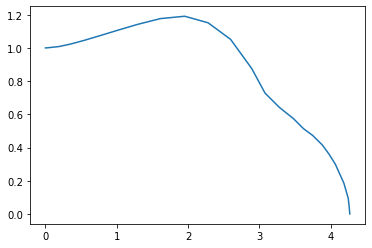

In [60]:
import matplotlib.pyplot as plt

plt.plot(x, z)
plt.show()